In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from tqdm import tqdm

In [2]:
import os
folder = 'data/'
csv_files = [folder + f for f in os.listdir(folder) if f.endswith('.csv')]
print(csv_files)


['data/yang2fastlidar.csv', 'data/chrisFast2lidar.csv', 'data/fastlidar_log.csv', 'data/chrisfastlidar.csv', 'data/cfinallidarlog.csv', 'data/nicofastlidar.csv', 'data/yangfastlidar.csv', 'data/nico2lidar.csv', 'data/cfastlidar_log.csv']


In [3]:
import os
import json
import re
import pandas as pd

# Define file paths
file1 = "lidar_log_.csv"
file2 = "lidar_log_2.csv"
file3 = "fastlidar_log.csv"

def load_log(path):

    # Initialize a list to store parsed data
    data_buffer = []

    # Regular expression to match the JSON array in the Lidar data
    lidar_pattern = re.compile(r"\[.*\]")

    # Read and parse the CSV file
    with open(path, "r") as f:
        lines = f.readlines()

    for i,line in tqdm(enumerate(lines)):
        try:
            # Find the JSON array (Lidar data)
            lidar_match = lidar_pattern.search(line)
            if not lidar_match:
                print(f"Skipping line with no Lidar data: {line.strip()}")
                continue
            
            # Extract the Lidar data as JSON
            lidar_str = lidar_match.group()
            samples = json.loads(lidar_str)
            
            # Split the line into other fields
            non_lidar_part = line.replace(lidar_str, "").strip()
            parts = non_lidar_part.split(",")

            if len(parts) < 3:
                print(f"Skipping malformed line: {i}")
                continue

            # Extract timestamp, speed, and angle
            tcounter = float(parts[0])
            speed = float(parts[-2])
            angle = float(parts[-1])

            # Append to buffer
            data_buffer.append([tcounter, samples, speed, angle])

        except (ValueError, json.JSONDecodeError) as e:
            print(f"Error parsing line:\n{line.strip()}\nError: {e}")

    # Convert parsed data to a DataFrame
    df = pd.DataFrame(data_buffer, columns=["ts", "lidar", "speed", "angle"])
    return df

# Save to a new CSV file
# df = load_log(file1)
# df = pd.concat([load_log(file1), load_log(file2),load_log(file3)])
df = pd.concat([load_log(f) for f in csv_files])
df.head()
# df = pd.concat([load_log(file1), load_log(file2)])

750it [00:00, 3336.62it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


10383it [00:02, 3652.02it/s]
757it [00:00, 3791.02it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


8702it [00:02, 3707.66it/s]
790it [00:00, 3969.68it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


16923it [00:04, 3820.12it/s]
722it [00:00, 3619.29it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


7142it [00:02, 3352.66it/s]
760it [00:00, 3485.60it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


27002it [00:07, 3631.45it/s]
790it [00:00, 3967.36it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


18242it [00:05, 3154.39it/s]
714it [00:00, 3545.37it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


7562it [00:02, 3548.01it/s]
753it [00:00, 3744.51it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


12362it [00:03, 3665.65it/s]
706it [00:00, 3513.72it/s]

Skipping line with no Lidar data: ts,lidar,speed,angle


5401it [00:01, 3419.72it/s]


,ts,lidar,speed,angle
0,0.021888,"[471.9999694824219, 471.9999694824219, 471.199...",0.0,0.0
1,0.032536,"[471.9999694824219, 471.9999694824219, 471.199...",0.0,0.0
2,0.056466,"[471.9999694824219, 471.9999694824219, 471.199...",0.0,0.0
3,0.064216,"[471.1999816894531, 471.1999816894531, 471.199...",0.0,0.0
4,0.090821,"[471.1999816894531, 471.1999816894531, 471.199...",0.0,0.0


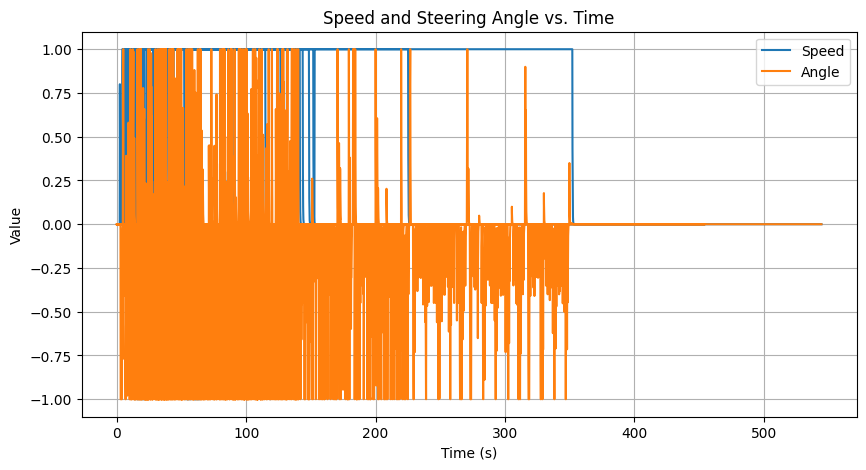

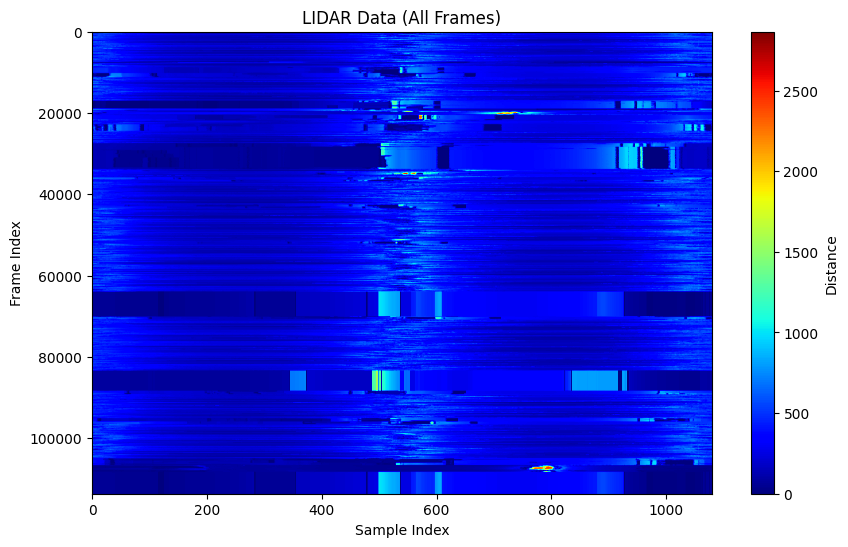

In [4]:
def sanity_plot(df):
    # ----------------------------------
    # Optionally, still plot Speed/Angle
    # ----------------------------------
    plt.figure(figsize=(10, 5))
    plt.plot(df["ts"], df["speed"], label="Speed")
    plt.plot(df["ts"], df["angle"], label="Angle")
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.title("Speed and Steering Angle vs. Time")
    plt.legend()
    plt.grid(True)

    # ----------------------------------
    # Optionally, still plot IMU data
    # ----------------------------------
    # IMU Acceleration
    # imu_acc_matrix = np.array(df["imu_acc"].tolist())  # shape: (n_frames, 3)
    # plt.figure(figsize=(10, 5))
    # plt.plot(df["ts"], imu_acc_matrix[:, 0], label="Acc X")
    # plt.plot(df["ts"], imu_acc_matrix[:, 1], label="Acc Y")
    # plt.plot(df["ts"], imu_acc_matrix[:, 2], label="Acc Z")
    # plt.xlabel("Time (s)")
    # plt.ylabel("Acceleration (m/s^2)")
    # plt.title("IMU Acceleration vs. Time")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # # IMU Angular Velocity
    # imu_ang_matrix = np.array(df["imu_angle"].tolist())  # shape: (n_frames, 3)
    # plt.figure(figsize=(10, 5))
    # plt.plot(df["ts"], imu_ang_matrix[:, 0], label="Ang Vel X")
    # plt.plot(df["ts"], imu_ang_matrix[:, 1], label="Ang Vel Y")
    # plt.plot(df["ts"], imu_ang_matrix[:, 2], label="Ang Vel Z")
    # plt.xlabel("Time (s)")
    # plt.ylabel("Angular Velocity (rad/s)")
    # plt.title("IMU Angular Velocity vs. Time")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # ---------------------------------------------------
    #  Visualize ALL LIDAR frames as a 2D "image"
    # ---------------------------------------------------
    # Convert list of lists into a 2D array:
    # shape will be (#_of_frames, #_of_lidar_samples)
    lidar_matrix = np.array(df["lidar"].tolist())

    # Plot as an image with each row = 1 frame, each column = 1 sample
    plt.figure(figsize=(10, 6))
    plt.imshow(lidar_matrix, cmap="jet", aspect="auto")
    plt.colorbar(label="Distance")
    plt.xlabel("Sample Index")
    plt.ylabel("Frame Index")
    plt.title("LIDAR Data (All Frames)")
    plt.show()

    # Check if the dataframe contains the "lidar_cleaned" column
    if "lidar_cleaned" in df.columns:
        # Convert list of lists into a 2D array for "lidar_cleaned":
        lidar_cleaned_matrix = np.array(df["lidar_cleaned"].tolist())

        # Plot as an image with each row = 1 frame, each column = 1 sample
        plt.figure(figsize=(10, 6))
        plt.imshow(lidar_cleaned_matrix, cmap="jet", aspect="auto")
        plt.colorbar(label="Distance")
        plt.xlabel("Sample Index")
        plt.ylabel("Frame Index")
        plt.title("LIDAR Cleaned Data (All Frames)")
        plt.show()

sanity_plot(df)

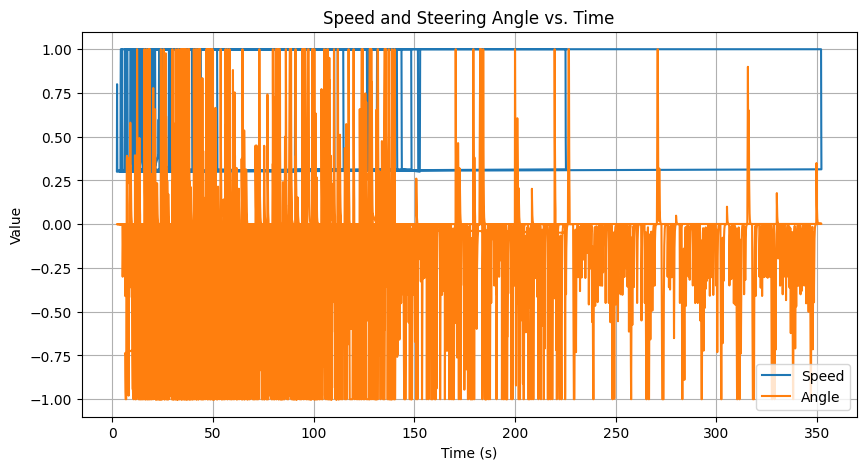

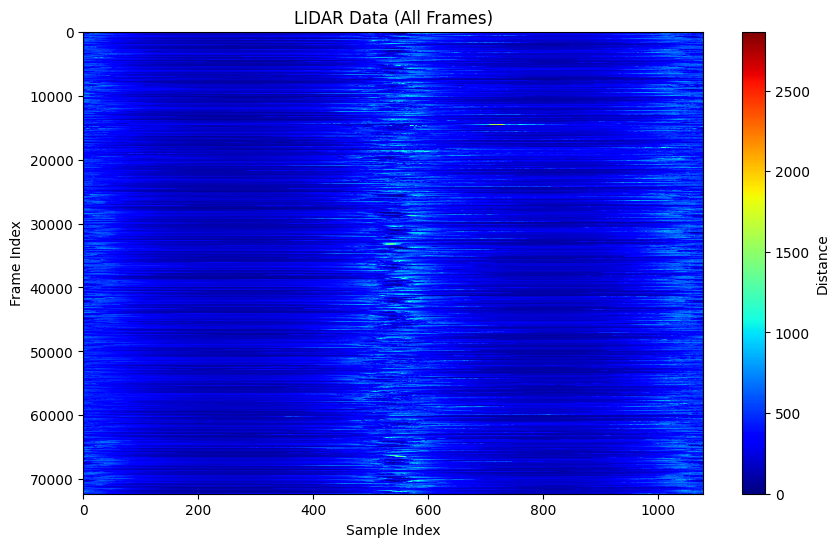

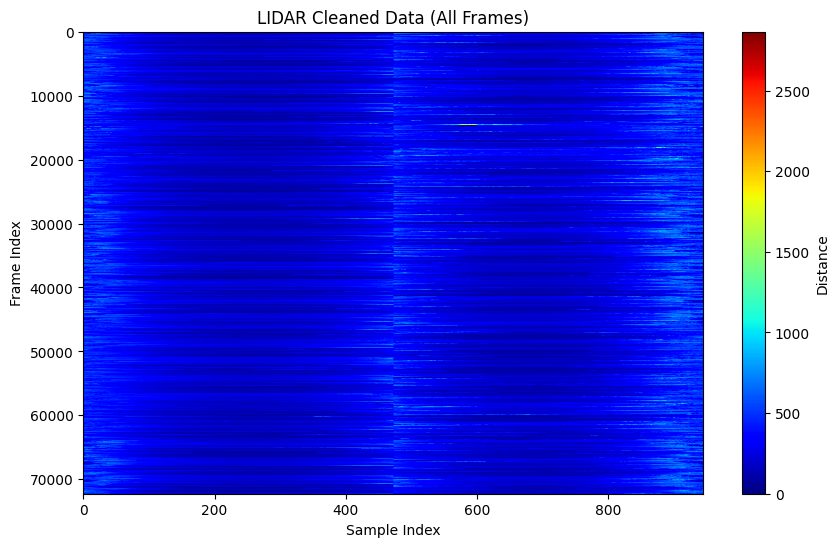

In [5]:
# eliminate all rows within N rows where speed is 0 or less
N = 300
df["speed"].rolling(N).mean().dropna()
df = df[df["speed"] > 0.3]
# reset index
df = df.reset_index(drop=True)
# Remove the 45° cone from the center
def remove_center_cone(lidar_data, cone_angle=45):
    num_samples = len(lidar_data)
    center_index = num_samples // 2
    cone_samples = int((cone_angle / 360) * num_samples)
    return np.concatenate((lidar_data[:center_index - cone_samples // 2], lidar_data[center_index + cone_samples // 2:]))

df["lidar_cleaned"] = df["lidar"].apply(remove_center_cone)
# ---------------------------------------------------
sanity_plot(df)

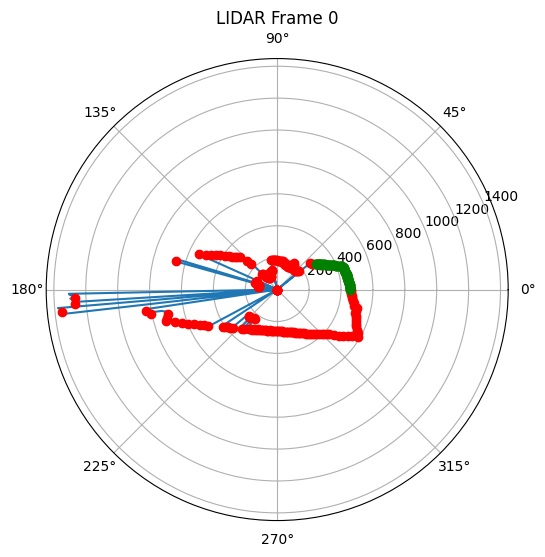

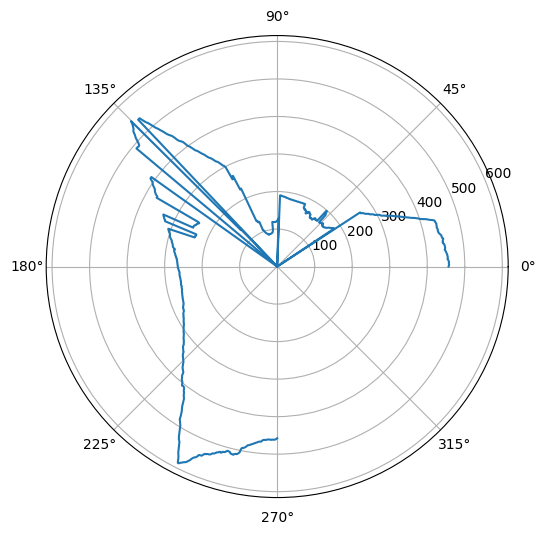

Average distance between neighboring points in the window: 0.8000081380208334
number of points in the frame 1080
number of points in the cleaned frame 946


In [6]:
# get 1 lidar frame
lidar_frame = df["lidar"][0]
# plot in circlular form
plt.figure(figsize=(6, 6))
plt.polar(np.linspace(0, 2*np.pi, len(lidar_frame)), lidar_frame)
n = 5
plt.polar(np.linspace(0, 2*np.pi, len(lidar_frame[::n])), lidar_frame[::n], color="red", marker="o", linestyle="")
d = 100
plt.polar(np.linspace(0, 2*np.pi/(len(lidar_frame)/len(lidar_frame[:d])), d), lidar_frame[:d], color="green", marker="o", linestyle="")
plt.title("LIDAR Frame 0")
plt.show()

lidar_clean = df["lidar_cleaned"][0]
plt.figure(figsize=(6, 6))
plt.polar(np.linspace(0, 2*np.pi - np.pi/2, len(lidar_clean)), lidar_clean)
plt.show()
# get average disatnce between neighboring points
# lidar_frame = df["lidar"][0]
lidar_frame = np.array(lidar_frame)
window_size = 3
# Calculate the average distance between neighboring points within the window
distances = np.abs(np.diff(lidar_frame))
average_distance = np.mean(distances[:window_size])
print(f"Average distance between neighboring points in the window: {average_distance}")
print("number of points in the frame", len(lidar_frame))
print("number of points in the cleaned frame", len(lidar_clean))

In [7]:

def create_memmap_files(
    df, 
    lidar_path="lidar_memmap.dat", 
    angle_path="angle_memmap.dat",
    ts_path="ts_memmap.dat",
    dtype_lidar='float32',
    dtype_angle='float32',
    dtype_ts='float64'
):
    """
    Creates memory-mapped files on disk from the given dataframe.

    df must have columns:
        - 'lidar_cleaned'  (each entry is a 1D array, e.g. length=720)
        - 'angle'
        - 'ts'
    """
    N = len(df)
    # We'll assume each LiDAR row is a 1D array of length 720
    num_lidar_points = len(df['lidar_cleaned'].iloc[0])

    # Create memmaps:
    lidar_mm = np.memmap(lidar_path, dtype=dtype_lidar, mode='w+', shape=(N, num_lidar_points))
    angle_mm = np.memmap(angle_path, dtype=dtype_angle, mode='w+', shape=(N,))
    ts_mm    = np.memmap(ts_path,    dtype=dtype_ts,    mode='w+', shape=(N,))

    # Populate them
    for i in range(N):
        lidar_mm[i, :] = df['lidar_cleaned'].iloc[i]
        angle_mm[i] = df['angle'].iloc[i]
        ts_mm[i] = df['ts'].iloc[i]

    # Flush to disk
    lidar_mm.flush()
    angle_mm.flush()
    ts_mm.flush()

    # If you want to compute mean/std for standardization:
    # We can do that in-memory by reading back from the memmap in slices 
    # or simply from the original dataframe. For simplicity:
    lidar_matrix = np.stack(df["lidar_cleaned"].values, axis=0)
    lidar_mean = np.mean(lidar_matrix, axis=0)
    lidar_std = np.std(lidar_matrix, axis=0)
    lidar_std[lidar_std == 0] = 1.0

    # Save the mean/std to JSON (or you can use .npy)
    with open("lidar_scaler.json", "w") as f:
        json.dump({"mean": lidar_mean.tolist(), "std": lidar_std.tolist()}, f)

    print("Memmap files created and scaler saved.")

# Create memmap files
create_memmap_files(df)
del df

Memmap files created and scaler saved.


dev : cpu
Found 1967 segments with large gaps.
Encoder Model:
LidarEncoder(
  (net): Sequential(
    (0): Linear(in_features=946, out_features=128, bias=True)
    (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
  )
)
Decoder Model:
LidarDecoder(
  (net): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=946, bias=True)
  )
)
start AE training


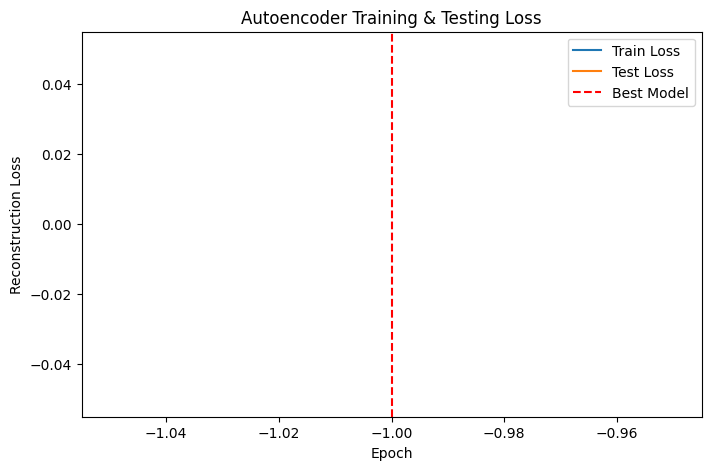

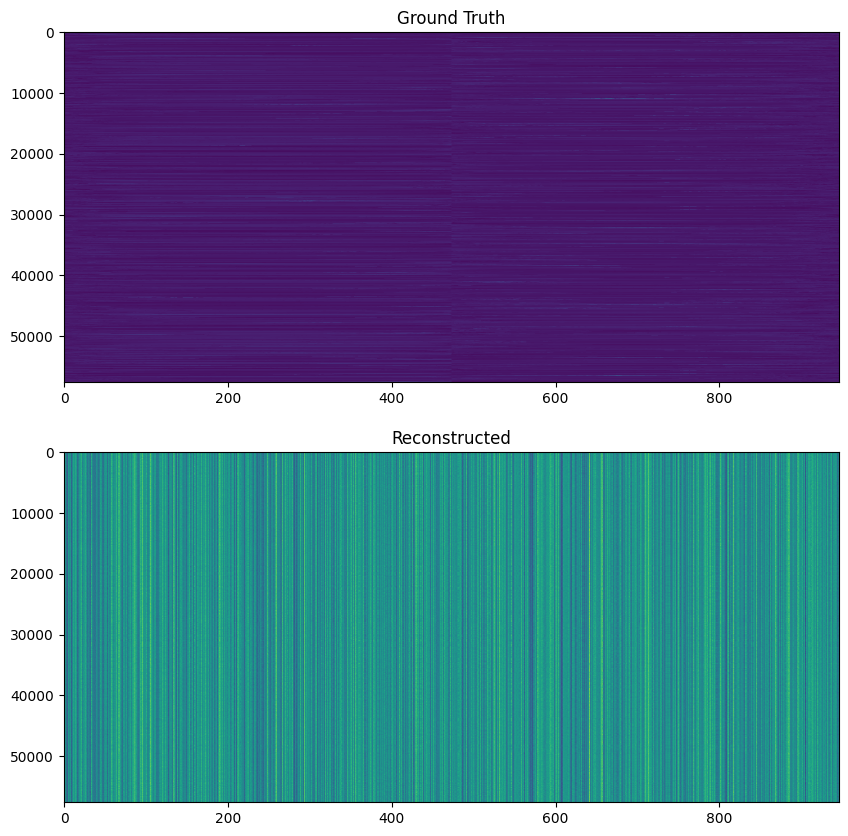

LSTM Model:
LSTMModel(
  (encoder): LidarEncoder(
    (net): Sequential(
      (0): Linear(in_features=946, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
      (3): Linear(in_features=128, out_features=64, bias=True)
    )
  )
  (lstm): LSTM(64, 64, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Best model at epoch 0 with test loss = inf


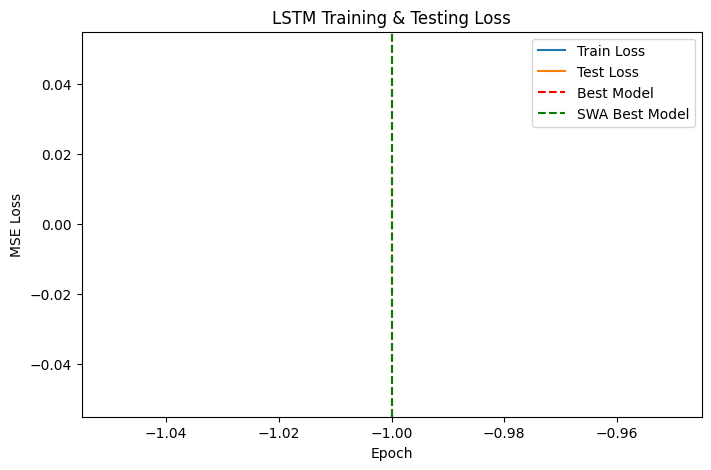

/tmp/ipykernel_1313265/3957404359.py:501: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/okbest_LSTM.pth"))


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [4]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, RandomSampler
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.optim.swa_utils import AveragedModel, SWALR

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("dev :", device)
# -----------------------------------
# (A) DATA BALANCING 
# -----------------------------------
# 1) Compute histogram and weights
# hist, bin_edges = np.histogram(df["angle"], bins=100, density=False)
# hist = hist + 1  # Avoid division by zero
# weights = (1.0 / hist)**0.95
# bin_indices = np.digitize(df["angle"], bin_edges[:-1])
# sampling_weights = np.array([weights[idx - 1] for idx in bin_indices])
# sampling_weights /= sampling_weights.sum()

# # 2) Resample the dataset
# resampled_df = df.sample(
#     n=len(df),
#     replace=True,
#     weights=sampling_weights,
#     random_state=42
# )

# 3) Sort the resampled dataset by timestamp to restore chronological order
# resampled_df = resampled_df.sort_values(by="ts").reset_index(drop=True)
# resampled_df = df

# OPTIONAL: If you want to skip large temporal gaps. 
# E.g., if timestamp is in seconds and you skip when gap > 2s:
time_threshold = 0.5  # seconds
# ts_vals = resampled_df["ts"].values
# large_gap_indices = np.where(np.diff(ts_vals) > time_threshold)[0]
# print(f"Found {len(large_gap_indices)} large gaps.")

# You can store these gap boundaries if you want to segment your data into multiple sequences. 
# For this example, we'll just keep them in mind for sequence creation.

# -----------------------------------
# (B) CREATE SEQUENCES FOR LSTM
# -----------------------------------
# We'll define a custom Dataset that:
#   - Takes the entire sorted DataFrame
#   - Creates subsequences of length seq_len
#   - Skips across large gaps in timestamp


class MemmapSequenceDataset(Dataset):
    def __init__(
        self,
        lidar_path="lidar_memmap.dat",
        angle_path="angle_memmap.dat",
        ts_path="ts_memmap.dat",
        scaler_path="lidar_scaler.json", 
        seq_len=60,
        time_threshold=2.0,
        dtype_lidar='float32',
        dtype_angle='float32',
        dtype_ts='float64'
    ):
        """
        A Dataset that reads LiDAR, angle, and timestamps from memmapped files.
        """
        self.seq_len = seq_len
        self.time_threshold = time_threshold

        # 1) Read shapes from disk or pass them in if known ahead of time
        #    Here we'll assume you know how many rows (N) and columns (num_lidar_points).
        #    Or you can do some trick to load them dynamically.
        #    We'll do it by opening them once to get shape.

        # Open them in read‐only
        self.lidar_data = np.memmap(lidar_path, dtype=dtype_lidar, mode='r')
        self.angle_data = np.memmap(angle_path, dtype=dtype_angle, mode='r')
        self.ts_data    = np.memmap(ts_path,    dtype=dtype_ts,    mode='r')

        # Figure out the shape of the LiDAR array. Suppose you know it's (N, 720). 
        # If we don't know N, we can infer from file size:
        lidar_size = self.lidar_data.size  # total number of float32
        # e.g. if each row has 720 points:
        num_lidar_points = 946  
        N = lidar_size // num_lidar_points

        # Reshape:
        self.lidar_data = self.lidar_data.reshape((N, num_lidar_points))
        self.angle_data = self.angle_data.reshape((N,))
        self.ts_data    = self.ts_data.reshape((N,))

        # 2) Load scaler
        with open(scaler_path, "r") as f:
            scaler_dict = json.load(f)
        self.lidar_mean = np.array(scaler_dict["mean"], dtype=np.float32)
        self.lidar_std  = np.array(scaler_dict["std"],  dtype=np.float32)

        # 3) Compute valid starts
        self.valid_starts = self._compute_valid_starts()

    def _compute_valid_starts(self):
        valid_starts = []
        N = len(self.lidar_data)
        large_gaps = 0
        for i in range(N - self.seq_len):
            segment_ts = self.ts_data[i : i + self.seq_len]
            diffs = np.diff(segment_ts)
            if np.any(diffs > self.time_threshold):
                large_gaps += 1
                continue
            valid_starts.append(i)
        print(f"Found {large_gaps} segments with large gaps.")
        return valid_starts

    def __len__(self):
        return len(self.valid_starts)

    def __getitem__(self, idx):
        start_idx = self.valid_starts[idx]
        end_idx = start_idx + self.seq_len

        # 1) Read LiDAR chunk
        #    Since lidar_data is memmapped, this slices from disk without loading everything
        lidar_seq = self.lidar_data[start_idx:end_idx]  # shape: (seq_len, 720)

        # 2) Standardize
        #    This returns a new np.array in memory for the slice
        lidar_seq = (lidar_seq - self.lidar_mean) / self.lidar_std

        # 3) Label = final angle in window
        # angle = self.angle_data[end_idx - 1]
        angle = self.angle_data[start_idx:end_idx]  # shape: (seq_len,)

        # 4) Convert to torch tensor
        lidar_seq_tensor = torch.tensor(lidar_seq, dtype=torch.float32)
        angle_tensor = torch.tensor(angle, dtype=torch.float32)

        return lidar_seq_tensor, angle_tensor


# Create the dataset
seq_len = 90 # e.g., 60 frames = 1 second or if 10hz data then 0.6 seconds
# full_dataset = SequenceDataset(resampled_df, seq_len=seq_len, time_threshold=time_threshold)
full_dataset = MemmapSequenceDataset(seq_len=seq_len, time_threshold=time_threshold)
# Split into train/test
# Because we have valid_starts in chronological order, we can do a simple ratio split:
dataset_size = len(full_dataset)
train_size = int(dataset_size * 0.8)
test_size = dataset_size - train_size

train_dataset, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, test_size],
    generator=torch.Generator().manual_seed(142)
)

# Example AE for 1D LiDAR (you might adapt for 2D or point-based architectures)
class LidarEncoder(nn.Module):
    def __init__(self, input_dim=946, latent_dim=64):
        super().__init__()
        self.latent_dim = latent_dim
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LayerNorm(128),
            # nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
            # nn.Dropout(0.2),
            # nn.ReLU(),
            # nn.Linear(64, latent_dim),
        )

    def forward(self, x):
        return self.net(x)

class LidarDecoder(nn.Module):
    def __init__(self, latent_dim=64, output_dim=946):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim)
        )

    def forward(self, z):
        return self.net(z)

# -----------------------------------
# (C) DEFINE THE LSTM MODEL
# -----------------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_dim=720, hidden_dim=64, num_layers=2, dropout=0.3, encoder = None):
        super(LSTMModel, self).__init__()
        
        self.encoder = encoder
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # batch_first=True => input shape is (batch, seq_len, input_dim)
        self.lstm = nn.LSTM(
            input_size= input_dim if encoder is None else encoder.latent_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout
        )
        
        self.fc = nn.Linear(hidden_dim, 1)
        
    def forward(self, x):
        if self.encoder:
            with torch.no_grad():
                x = self.encoder(x)
            # x = self.encoder(x)
        # x shape: (batch, seq_len, input_dim)
        lstm_out, (h_n, c_n) = self.lstm(x)  # lstm_out: (batch, seq_len, hidden_dim)
        
        # We can take the final time step's output:
        # last_timestep = lstm_out[:, -1, :]  # shape: (batch, hidden_dim)
        
        # Pass it through the fully connected layer
        out = self.fc(lstm_out)  # shape: (batch, 1)
        return out
encoder = LidarEncoder()
decoder = LidarDecoder()

print("Encoder Model:")
print(encoder)
print("Decoder Model:")
print(decoder)


# -----------------------------------
# (D) SETUP TRAINING
# -----------------------------------
batch_size = 64

train_losses = []
test_losses = []

best_test_loss = float('inf')
best_epoch = -1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, prefetch_factor=2, num_workers=4, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, prefetch_factor=2, num_workers=4, drop_last=True)

autoencoder_params = list(encoder.parameters()) + list(decoder.parameters())

optimizer_ae = torch.optim.Adam(autoencoder_params, lr=1e-3, weight_decay=1e-5)
# scheduler_ae = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_ae, T_max=10, eta_min=1e-5)
scheduler_ae = torch.optim.lr_scheduler.StepLR(optimizer_ae, step_size=30, gamma=0.1)
criterion_ae = nn.MSELoss()

encoder.to(device)
decoder.to(device)
print("start AE training")

# num_epochs_ae = 65 # 50
# # AE training loop
# for epoch in tqdm(range(num_epochs_ae)):
#     train_sum_loss = 0
#     for (lidar_seq_batch, angle_batch) in train_loader: 
#         # lidar_batch shape: [batch_size, input_dim]
#         lidar_seq_batch = lidar_seq_batch.to(device)
#         #augment
#         lidar_seq_batch = lidar_seq_batch + torch.randn_like(lidar_seq_batch) * 0.01
#         shift = torch.randint(-5, 5, (1,)).item()
#         lidar_seq_batch = torch.roll(lidar_seq_batch, shifts=shift, dims=2)
#         # Forward
#         z = encoder(lidar_seq_batch)
#         x_recon = decoder(z)

#         loss_ae = criterion_ae(x_recon, lidar_seq_batch)
        
#         # Backprop
#         optimizer_ae.zero_grad()
#         loss_ae.backward()
#         optimizer_ae.step()
#         train_sum_loss += loss_ae.item()
#     train_sum_loss /= len(train_loader)
#     train_losses.append(train_sum_loss)
#     scheduler_ae.step()
    
#     with torch.no_grad():
#         sum_loss = 0
#         for(lidar_seq_batch, angle_batch) in test_loader:
#             lidar_seq_batch = lidar_seq_batch.to(device)
#             z = encoder(lidar_seq_batch)
#             x_recon = decoder(z)
#             loss_ae = criterion_ae(x_recon, lidar_seq_batch)
#             sum_loss += loss_ae.item()
#     sum_loss /= len(test_loader)
#     test_losses.append(sum_loss)

#     if epoch % 5 == 0:
#         print(f"[AE] Test Epoch {epoch}: recon_loss = {sum_loss:.4f}")
#     if sum_loss < best_test_loss:
#         best_test_loss = sum_loss
#         best_epoch = epoch
#         torch.save(encoder.state_dict(), "models/best_encoder.pth")
#         torch.save(decoder.state_dict(), "models/best_decoder.pth")

#     if epoch % 5 == 0:
#         print(f"[AE] Train Epoch {epoch}: recon_loss = {train_sum_loss:.4f}")

# load the best encoder and decoder
# encoder.load_state_dict(torch.load("models/best_encoder.pth"))
# decoder.load_state_dict(torch.load("models/best_decoder.pth"))
encoder.to(device)
decoder.to(device)
encoder.eval()

# Plot the training and test losses of the Autoencoder
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.axvline(best_epoch, color='r', linestyle='--', label="Best Model")
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss")
plt.title("Autoencoder Training & Testing Loss")
plt.legend()
plt.show()

GT_x = []
pred_x = []
it = 0
with torch.no_grad():
    for (lidar_seq_batch, angle_batch) in test_loader:
        lidar_seq_batch = lidar_seq_batch.to(device)
        z = encoder(lidar_seq_batch)
        x_recon = decoder(z)
        GT_x.append(lidar_seq_batch.cpu().numpy())
        pred_x.append(x_recon.cpu().numpy())
        it += 1
        if it >= 10:
            break

GT_x = np.concatenate(GT_x, axis=0)
pred_x = np.concatenate(pred_x, axis=0)
# unroll teh first dimension
GT_x = GT_x.reshape(-1, GT_x.shape[-1])
pred_x = pred_x.reshape(-1, pred_x.shape[-1])
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(GT_x, aspect="auto")
plt.title("Ground Truth")
plt.subplot(2,1,2)
plt.imshow(pred_x, aspect="auto")
plt.title("Reconstructed")
plt.show()



# LSTM Model
del decoder

model = LSTMModel(input_dim=64, hidden_dim=64, num_layers=2, dropout=0.3, encoder=encoder)
# Create an SWA model wrapper
swa_model = AveragedModel(model).to(device)
print("LSTM Model:")
print(model)

criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-5)
# Use a custom learning rate schedule for SWA
swa_scheduler = SWALR(optimizer, anneal_strategy="cos", anneal_epochs=10, swa_lr=0.001)

### TRAIN THE LSTM MODEL

model.to(device)

num_epochs = 250#50  # fewer epochs as an example

train_losses = []
test_losses = []
lr = []
swa_test_losses = []
best_test_loss = float('inf')
best_epoch = -1
swa_start = 150
swa_best_loss = float('inf')
swa_best_epoch = -1

# for epoch in tqdm(range(num_epochs)):
#     model.train()
#     epoch_train_loss = 0.0
    
#     for (lidar_seq_batch, angle_batch) in train_loader:
#         lidar_seq_batch = lidar_seq_batch.to(device)  # shape: (B, seq_len, 720)
#         angle_batch = angle_batch.to(device).unsqueeze(-1)  # shape: (B, 1)
        
#         # Optionally, you can do data augmentation here,
#         # e.g. random roll of the LiDAR scans, but it's more complex in sequences.
#         lidar_seq_batch = lidar_seq_batch + torch.randn_like(lidar_seq_batch) * 0.01
#         shift = torch.randint(-5, 5, (1,)).item()
#         lidar_seq_batch = torch.roll(lidar_seq_batch, shifts=shift, dims=2)
#         angle_batch = angle_batch+shift/946
        
#         optimizer.zero_grad()
#         outputs = model(lidar_seq_batch)
#         # print(outputs.shape, angle_batch.shape)
#         loss = criterion(outputs, angle_batch)
#         loss.backward()
#         optimizer.step()
        
#         epoch_train_loss += loss.item() * len(lidar_seq_batch)
    
#     # Start SWA after a certain number of epochs
#     if epoch > swa_start:
#         swa_model.update_parameters(model)
#         swa_scheduler.step()

#     epoch_train_loss /= len(train_loader.dataset)
#     train_losses.append(epoch_train_loss)
    
#     # Evaluate on test set
#     model.eval()
#     epoch_test_loss = 0.0
#     with torch.no_grad():
#         for (lidar_seq_batch, angle_batch) in test_loader:
#             lidar_seq_batch = lidar_seq_batch.to(device)
#             angle_batch = angle_batch.to(device).unsqueeze(-1)
            
#             outputs = model(lidar_seq_batch)
#             loss = criterion(outputs, angle_batch)
#             epoch_test_loss += loss.item() * len(lidar_seq_batch)
    
#     epoch_test_loss /= len(test_loader.dataset)
#     test_losses.append(epoch_test_loss)
    
#     # Step the scheduler
#     scheduler.step()
#     lr.append(scheduler.get_last_lr()[0])
    
#     # Save best model
#     if epoch_test_loss < best_test_loss:
#         best_test_loss = epoch_test_loss
#         best_epoch = epoch
#         torch.save(model.state_dict(), "models/best_LSTM.pth")
    
#     if (epoch + 1) % 5 == 0:
#         print(f"[Epoch {epoch+1}/{num_epochs}] Train Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f} LR: {scheduler.get_last_lr()[0]}")


#     if (epoch + 1) % 10 == 0 and epoch > swa_start:
#         # Update batch norm statistics before evaluation
#         # torch.optim.swa_utils.update_bn(train_loader, swa_model)

#         # Use the SWA model for inference
#         swa_model.eval()
#         epoch_test_loss = 0.0
#         with torch.no_grad():
#             for (lidar_seq_batch, angle_batch) in test_loader:
#                 lidar_seq_batch = lidar_seq_batch.to(device)
#                 angle_batch = angle_batch.to(device).unsqueeze(-1)
                
#                 outputs = swa_model(lidar_seq_batch)
#                 loss = criterion(outputs, angle_batch)
#                 epoch_test_loss += loss.item() * len(lidar_seq_batch)
        
#         epoch_test_loss /= len(test_loader.dataset)
#         swa_test_losses.append((epoch, epoch_test_loss))
#         print(f"[SWA] Test Loss: {epoch_test_loss:.4f}")
#         if epoch_test_loss < swa_best_loss:
#             swa_best_loss = epoch_test_loss
#             swa_best_epoch = epoch
#             torch.save(swa_model.state_dict(), "models/swa_LSTM.pth")

print(f"Best model at epoch {best_epoch+1} with test loss = {best_test_loss:.4f}")

# -----------------------------------
# (E) PLOT TRAIN/TEST LOSS
# -----------------------------------
plt.figure(figsize=(8, 5))
# schale lr to match otehr curves
# lr = np.array(lr)
# lr = lr / lr.max()
# lr = lr * (max(train_losses) - min(train_losses)) + min(train_losses)
# plt.plot(lr, label='Learning Rate')
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.axvline(best_epoch, color='r', linestyle='--', label="Best Model")
plt.plot(*zip(*swa_test_losses), label='SWA Test Loss', marker='o')
plt.axvline(swa_best_epoch, color='g', linestyle='--', label="SWA Best Model")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("LSTM Training & Testing Loss")
plt.legend()
plt.show()

# -----------------------------------
# (F) EVALUATE THE BEST MODEL
# -----------------------------------
model.load_state_dict(torch.load("models/okbest_LSTM.pth"))
model.eval()
swa_model.load_state_dict(torch.load("models/okswa_LSTM.pth"))
swa_model.eval()
all_preds = []
swa_preds = []
all_targets = []
with torch.no_grad():
    for (lidar_seq_batch, angle_batch) in test_loader:
        lidar_seq_batch = lidar_seq_batch.to(device)
        angle_batch = angle_batch.to(device).unsqueeze(-1)
        
        preds = model(lidar_seq_batch)
        swa_pred = swa_model(lidar_seq_batch)
        all_preds.append(preds.cpu().numpy())
        swa_preds.append(swa_pred.cpu().numpy())
        all_targets.append(angle_batch.cpu().numpy())

swa_preds = np.concatenate(swa_preds, axis=0).flatten()
all_preds = np.concatenate(all_preds, axis=0).flatten()
all_targets = np.concatenate(all_targets, axis=0).flatten()

mse = np.mean((all_preds - all_targets)**2)
print(f"Final test MSE: {mse:.4f}")
swa_mse = np.mean((swa_preds - all_targets)**2)
print(f"SWA test MSE: {swa_mse:.4f}")

# -----------------------------------
# (G) PLOT TRUE vs PREDICTED
# -----------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(all_targets, all_preds, alpha=0.5)
plt.scatter(all_targets, swa_preds, alpha=0.2, color='green')
plt.xlabel("True Steering Angle")
plt.ylabel("Predicted Steering Angle")
plt.title("LSTM: True vs. Predicted Steering Angles")
plt.plot([-1,1], [-1,1], color='red')  # diagonal line for reference
plt.show()

# -----------------------------------
# ADDITIONAL METRICS (Optional)
# -----------------------------------
# You can plot or compute MAE, R^2, etc.
mae = np.mean(np.abs(all_preds - all_targets))
print(f"MAE: {mae:.4f}")

# e.g., a time-series plot of predicted vs. actual angles:
plt.figure(figsize=(10, 4))
plt.plot(all_targets[:200], label="True Angle")    # first 200 samples
plt.plot(all_preds[:200], label="Predicted Angle") # first 200 samples
plt.plot(swa_preds[:200], label="SWA Predicted Angle", color = "green") # first 200 samples
plt.title("Steering Angle Over Time (First 200 Test Samples)")
plt.xlabel("Time Index (sample #)")
plt.ylabel("Angle")
plt.legend()
plt.show()


/tmp/ipykernel_1313265/3993520991.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/okbest_LSTM.pth", map_location='cpu'))
/tmp/ip

Final test MSE: 0.0016
SWA test MSE: 0.0016


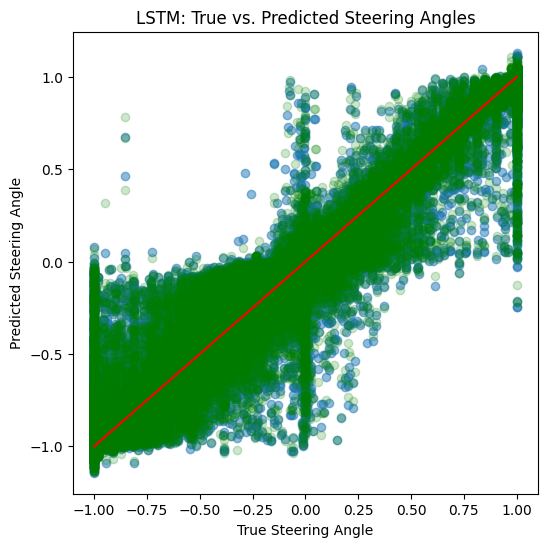

In [5]:
model.load_state_dict(torch.load("models/okbest_LSTM.pth", map_location='cpu'))
model.eval()
swa_model.load_state_dict(torch.load("models/okswa_LSTM.pth", map_location='cpu'))
swa_model.eval()
all_preds = []
swa_preds = []
all_targets = []
with torch.no_grad():
    for (lidar_seq_batch, angle_batch) in test_loader:
        lidar_seq_batch = lidar_seq_batch.to(device)
        angle_batch = angle_batch.to(device).unsqueeze(-1)
        
        preds = model(lidar_seq_batch)
        swa_pred = swa_model(lidar_seq_batch)
        all_preds.append(preds.cpu().numpy())
        swa_preds.append(swa_pred.cpu().numpy())
        all_targets.append(angle_batch.cpu().numpy())
# print(np.array(swa_preds).shape, np.array(all_preds).shape, np.array(all_targets).shape)
swa_preds = np.concatenate(swa_preds, axis=0).flatten()
all_preds = np.concatenate(all_preds, axis=0).flatten()
all_targets = np.concatenate(all_targets, axis=0).flatten()

mse = np.mean((all_preds - all_targets)**2)
print(f"Final test MSE: {mse:.4f}")
swa_mse = np.mean((swa_preds - all_targets)**2)
print(f"SWA test MSE: {swa_mse:.4f}")

# -----------------------------------
# (G) PLOT TRUE vs PREDICTED
# -----------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(all_targets, all_preds, alpha=0.5)
plt.scatter(all_targets, swa_preds, alpha=0.2, color='green')
plt.xlabel("True Steering Angle")
plt.ylabel("Predicted Steering Angle")
plt.title("LSTM: True vs. Predicted Steering Angles")
plt.plot([-1,1], [-1,1], color='red')  # diagonal line for reference
plt.show()


1261440


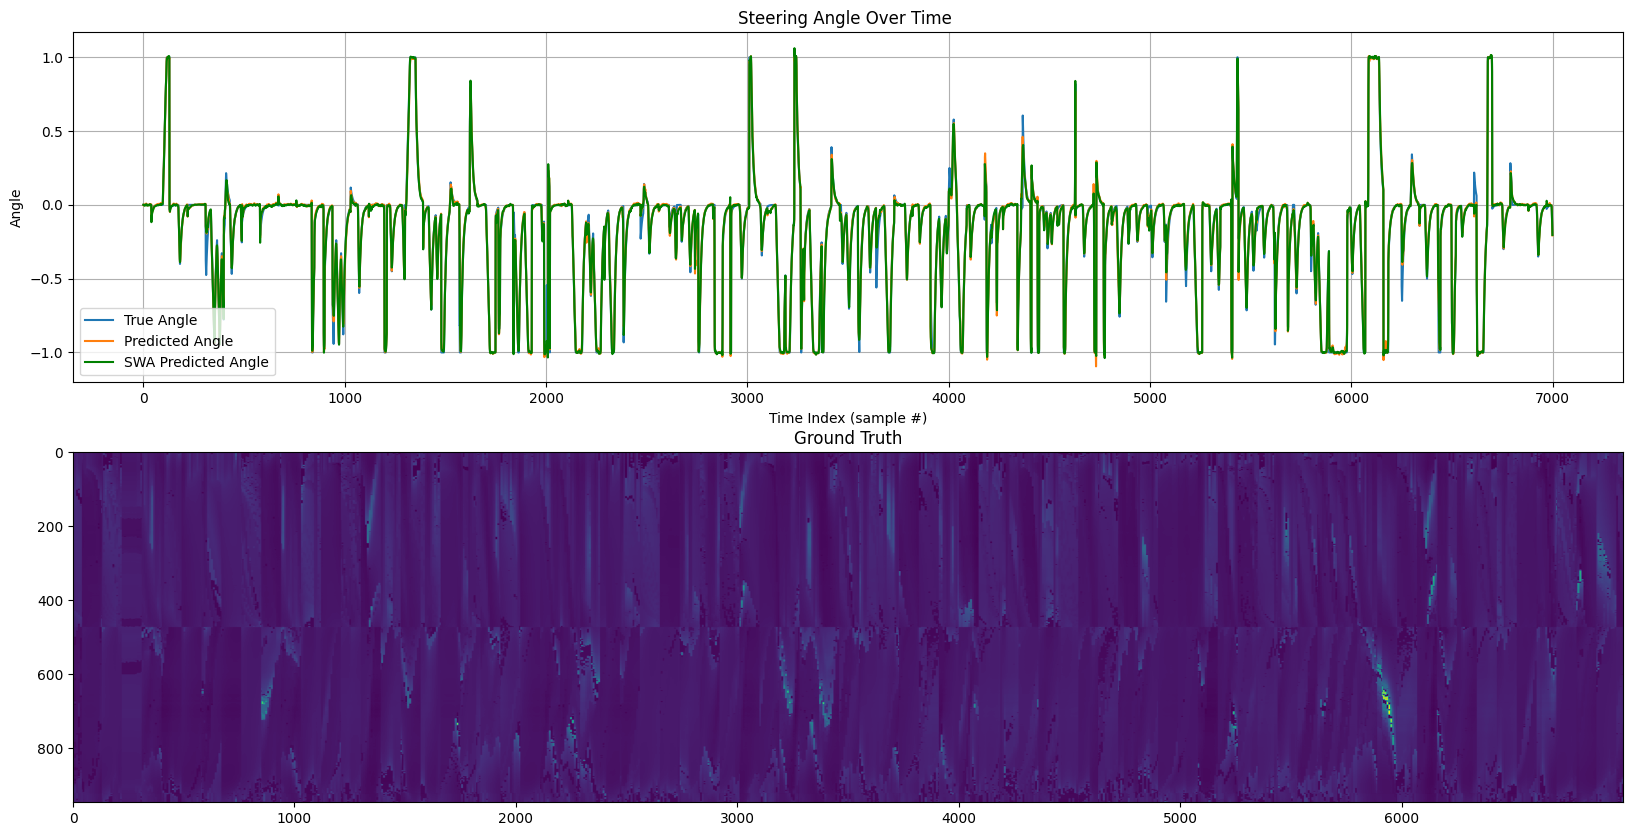

In [6]:
# e.g., a time-series plot of predicted vs. actual angles:
max_ = len(all_targets)
print(max_)
start = 5000
end = 12000
end = min(end, max_)
plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
plt.plot(all_targets[start:end], label="True Angle")    # first 200 samples
plt.plot(all_preds[start:end], label="Predicted Angle") # first 200 samples
plt.plot(swa_preds[start:end], label="SWA Predicted Angle", color = "green") # first 200 samples
plt.title("Steering Angle Over Time ")
plt.xlabel("Time Index (sample #)")
# plt.xticks(np.linspace(0, end-start, num=11))
plt.ylabel("Angle")
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.imshow(GT_x[start:end].T, aspect="auto")
plt.title("Ground Truth")
plt.show()

In [37]:
# Export and save the best LSTM model
model.load_state_dict(torch.load("models/okbest_LSTM.pth"))
model.eval()

# Convert the model to TorchScript
example_input = torch.randn(1, seq_len, 946).to(device)

# Trace the model
traced_model = torch.jit.trace(model, example_input)
traced_model.eval()

# Save the TorchScript model
output_path = "models/lstm_steering_model.pt"
traced_model.save(output_path)
print(f"Model saved to {output_path}")

# Export and save the SWA LSTM model
swa_model.load_state_dict(torch.load("models/swa_LSTM.pth"))
swa_model.eval()

# Trace the SWA model
traced_swa_model = torch.jit.trace(swa_model, example_input)
traced_swa_model.eval()

# Save the TorchScript SWA model
swa_output_path = "models/swa_lstm_steering_model.pt"
traced_swa_model.save(swa_output_path)
print(f"SWA Model saved to {swa_output_path}")

Model saved to models/lstm_steering_model.pt
SWA Model saved to models/swa_lstm_steering_model.pt


/tmp/ipykernel_275180/369026519.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/best_LSTM.pth"))
/tmp/ipykernel_275180/369026519

In [ ]:
import ai_edge_torch

model.load_state_dict(torch.load("models/okbest_LSTM.pth", map_location='cpu'))
model.eval()

# Convert the model to TorchScript
example_input = torch.randn(1, seq_len, 946).to(device)

# Trace the model
traced_model = torch.jit.trace(model, example_input)
traced_model.eval()

# Save the TorchScript model
output_path = "models/oklstm_steering_model.pt"
traced_model.save(output_path)
print(f"Model saved to {output_path}")


# full_dataset.export_scaler("LSTM_scaler.json")
# savt to tf lite for teh coral tpu
# edge_model = ai_edge_torch.from_torch(traced_model, example_input)
# edge_model.save("models/lstm_steering_model.tflite")
edge_model = ai_edge_torch.convert(model, (example_input,))
edge_model.export(f'okLSTM_steering.tflite')

2025-01-29 13:13:59.736770: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-29 13:13:59.943492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738174440.045075 1313265 cuda_dnn.cc:8593] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738174440.068532 1313265 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 13:14:00.300746: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [9]:
import tflite_runtime.interpreter as tflite
import numpy as np
import time

# Load the TFLite model and allocate tensors.
interpreter = tflite.Interpreter(model_path="LSTM_steering.tflite",
                                 experimental_delegates=[tflite.load_delegate('libedgetpu.so.1')])
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare the input data
example_input = np.random.randn(1, seq_len, 946).astype(np.float32)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], example_input)

# Benchmark the runtime performance
num_runs = 1000
start_time = time.time()

for _ in range(num_runs):
    interpreter.invoke()

end_time = time.time()
average_runtime = (end_time - start_time) / num_runs

print(f"Average runtime on Coral TPU: {average_runtime:.6f} seconds")

ValueError: Failed to load delegate from libedgetpu.so.1
